## <a id="3"></a>

### Note book to be used for frud detective api

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer

## Importing Data

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

## Basic Data Analysis

In [3]:
print(df.shape)

(5572, 5)


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Columns Meaning

* v1 is our label column. Which represent wether the email is spam or not spam.
* v2 column contains the text of the emails.
* Other columns are not important.

### Dropping the unnecessary columns.

In [5]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [6]:
df['v1'] = np.where(df['v1'] == 'spam', 'scam', 'not-scam')

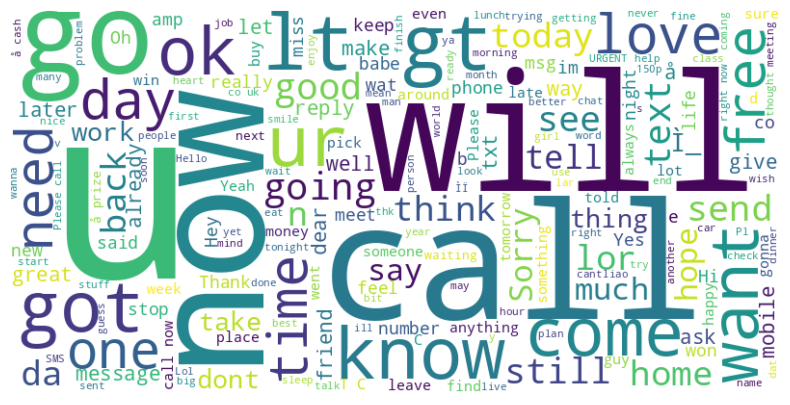

In [7]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(df.v2))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot: xlabel='v1', ylabel='count'>

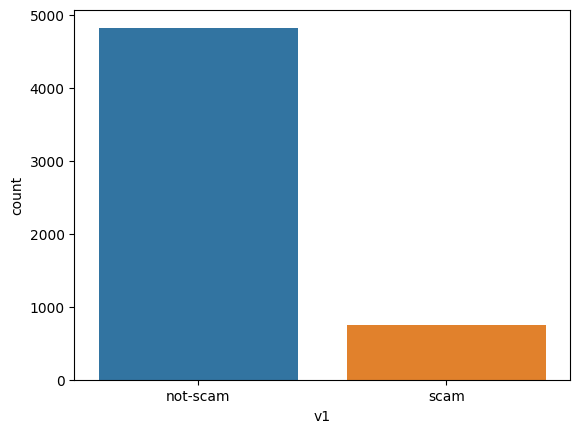

In [8]:
sns.countplot(x = df["v1"], data = df)

In [9]:
df["v1"].value_counts()

not-scam    4825
scam         747
Name: v1, dtype: int64

In [10]:
# It seems that the given dataset is imbalanced.

4825 // 747

6

### Transforming the values of the output variable into 0 and 1.

In [11]:
df['v1'] = df["v1"].map({'scam':1,'not-scam':0})

### balancing the dataset first.

In [12]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class 

df_majority = df[(df['v1'] == 0)] 

df_minority = df[(df['v1'] == 1)] 

# upsample minority class(oversampling)
df_minority_upsampled = resample(df_minority,
                                 
replace = True,    # sample with replacement  
                                 
 n_samples = 4825, # to match majority class     
                                 
 random_state = 42) 

# reproducible results
    
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

### The given dataset doesn't contain any missing values as shown below.

In [13]:
df_upsampled.isnull().sum()

v1    0
v2    0
dtype: int64

### Converting text data into vectors.

Machine learning models don't understand textual data. So we have to convert it into numerical form. There are many methods for doing this. For instance, Bag of words, TF-IDF, One-Hot encoding, Word Embedding, etc. We will use a bag of words because it is very intuitive.

## Bag of words:

 In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.
 
 ## Example Below

In [14]:
# Let's try to convert these text into vectors using bag of words

text = ['Hello my name is james', 'james this is my python notebook', 'james trying to create a big dataset', 'james of words to try differnt', 'features of count vectorizer']

#vectorizer = CountVectorizer(stop_words='english', binary=True)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)# stop_words=ENGLISH_STOP_WORDS)
#count_matrix = tfidf_vectorizer.fit_transform(text)

#count_array = count_matrix.toarray()

#df1 = pd.DataFrame(data = count_array,columns = tfidf_vectorizer.get_feature_names_out())

#df1

### Converting email texts into vectors.

In [15]:
# Remove the stop words and transform the texts into the vectorized input variables X

X = df["v2"]

y = df["v1"]

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Training the model

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3900,), (1672,), (3900,), (1672,))

In [17]:
tfidf_vectorizer.fit(X_train)
train_idf = tfidf_vectorizer.transform(X_train)
test_idf = tfidf_vectorizer.transform(X_test)

In [18]:
#clf = GaussianNB()
#clf.fit(X_train, y_train)
#clf.score(X_test, y_test)
#0.8833732057416268

In [20]:
#train_idf, y_train#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier()
#knn.fit(X_train, y_train)
#knn.score(X_test, y_test)
#0.8977272727272727

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_idf, y_train)
nb.score(test_idf, y_test)

0.97188995215311

The accuracy of the model is pretty good. It is almsot 97% voila.

In [22]:
nb.predict(train_idf[:20])

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
nb.predict(test_idf)

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
#vector = CountVectorizer()

#count_matrix = vector.fit_transform(text)
from sklearn.pipeline import Pipeline
#count_array = 
#count_matrix.toarray()
pipeline = Pipeline(steps= [('tfidf', TfidfVectorizer(max_features=1000)),
                            ('model', MultinomialNB())])
#testing our pipeline
text = ["URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18'Hello my name is james"]

# predict the label using the pipeline
pipeline.fit(X_train, y_train)
pipeline.predict(text)
#print(count_array.shape)

array([1])

In [25]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)